In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Dataset

df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#checking null

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
print(df["Age"].min(),df["Age"].max())

18 92


In [6]:
#Creating Agegroup column

age_bins = [18, 30, 40, 50, 60, 92]
age_labels = ['Young', 'Adult', 'Middle-aged', 'Senior', 'Elderly']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [7]:
# Identify object columns

categorical = df.nunique()[df.nunique () < 6].keys().tolist()

In [8]:
categorical

['Geography',
 'Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited',
 'AgeGroup']

In [9]:
categorical.remove("NumOfProducts")
categorical.remove("Exited")

In [10]:
categorical

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'AgeGroup']

In [11]:
#Drop unnecassary columns

df.drop(["RowNumber","Surname","Age"],axis=1,inplace=True)

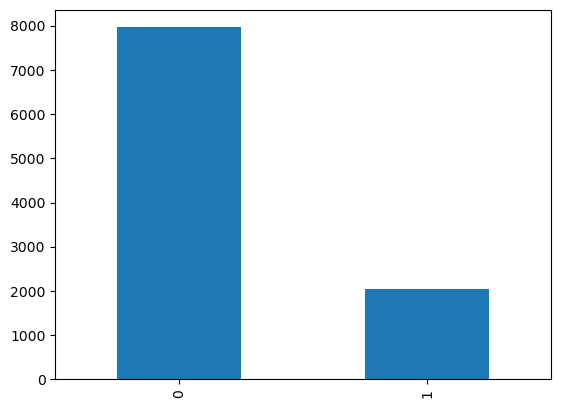

In [12]:
df["Exited"].value_counts().plot(kind="bar")
plt.show()

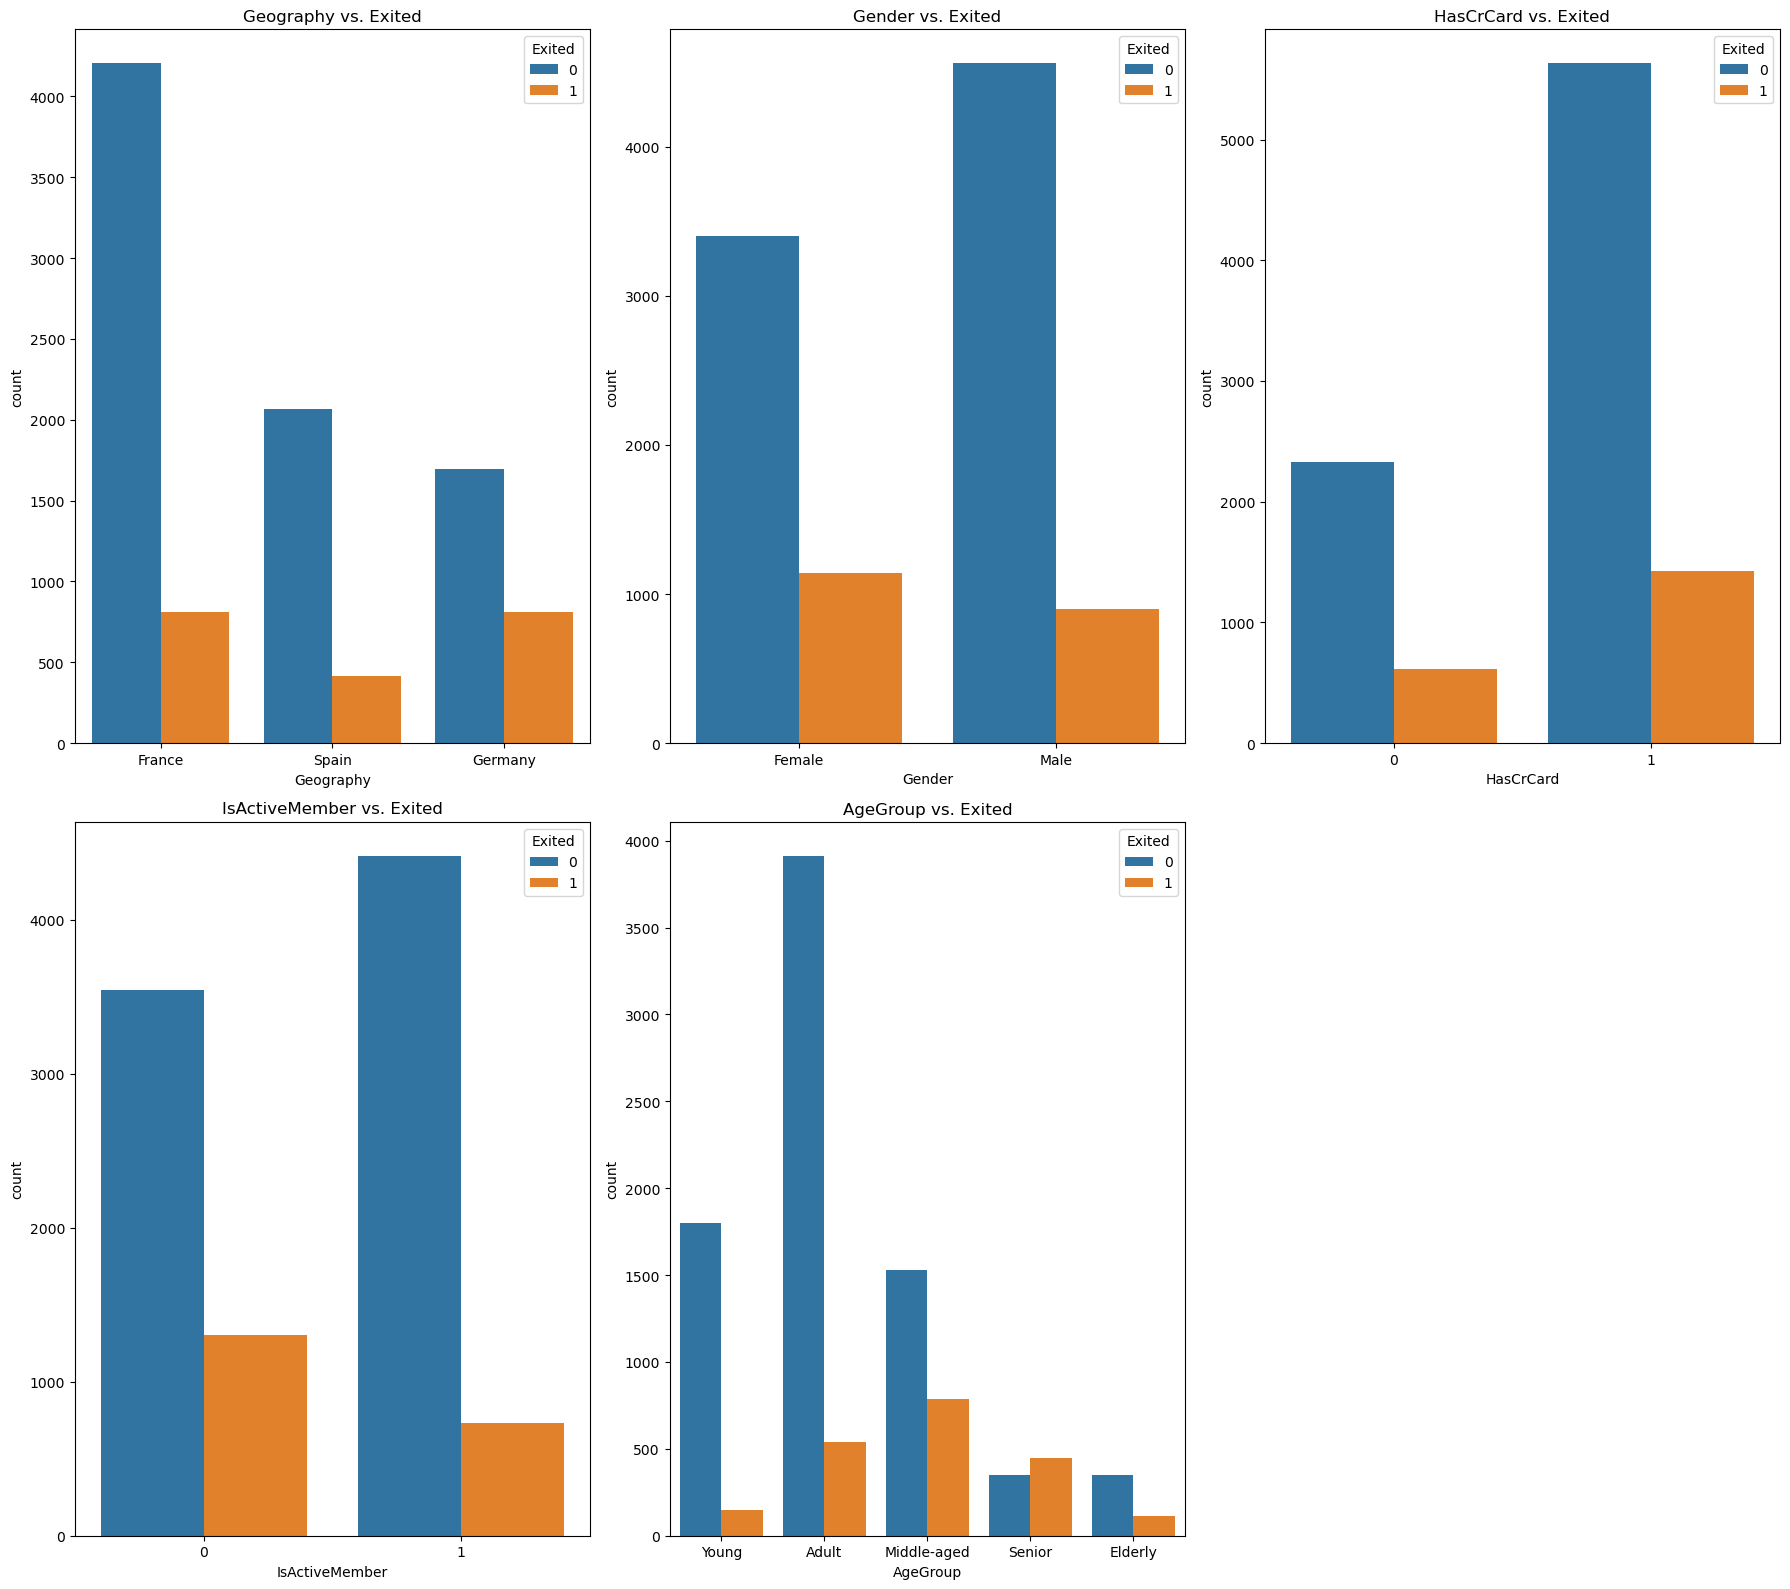

In [13]:
#visiluation object columns by Exited

fig, ax = plt.subplots(2, 3, figsize=(18, 16))

row = 0
col = 0

for feature in categorical:
    sns.countplot(feature, hue='Exited', data=df, ax=ax[row][col])
    ax[row][col].set_title(f"{feature} vs. Exited")
    col += 1
    if col == 3:
        col = 0
        row += 1
#deleted empty graph
fig.delaxes(ax[1, 2])

plt.tight_layout()
plt.show()

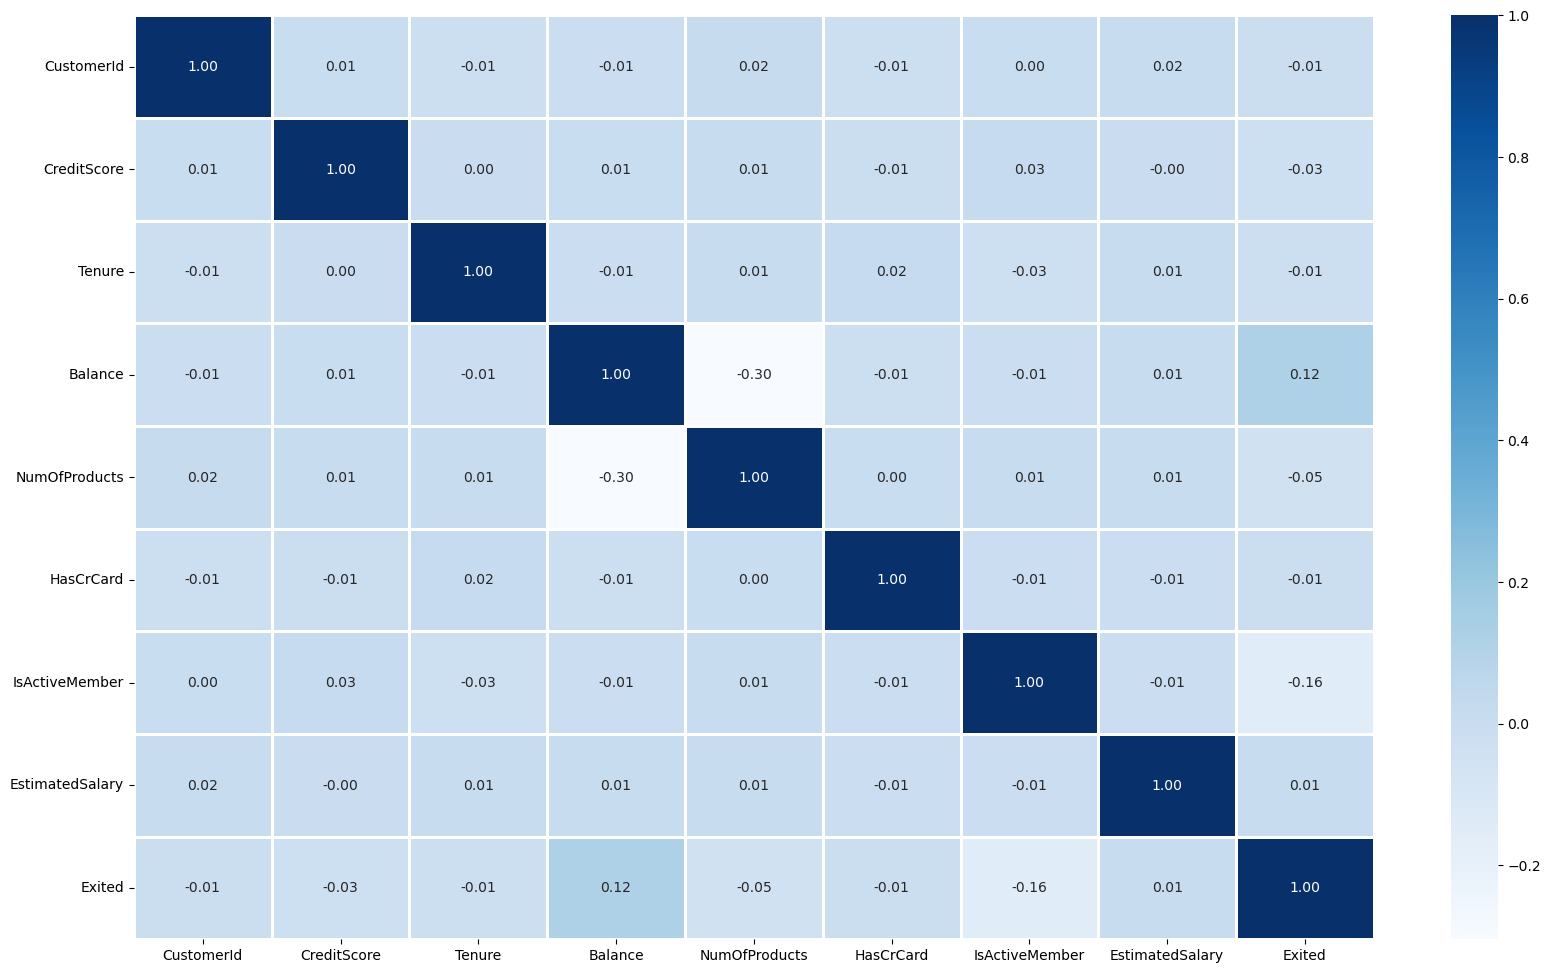

In [14]:
# heatmap 

plt.figure(figsize = (20, 12))

corr = df.corr()

sns.heatmap(corr, linewidths = 1, annot = True,cmap='Blues', fmt = ".2f")
plt.show()

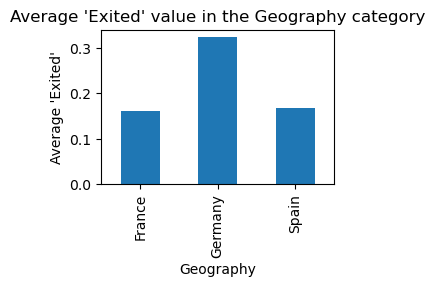

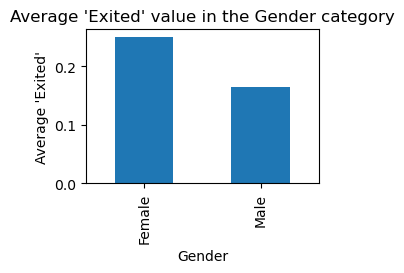

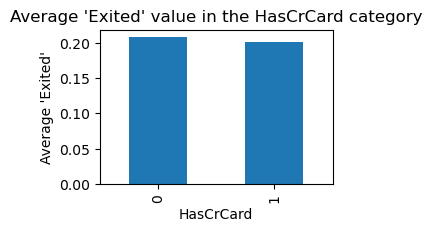

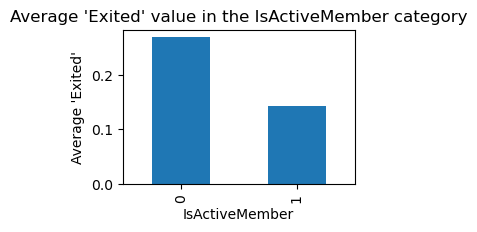

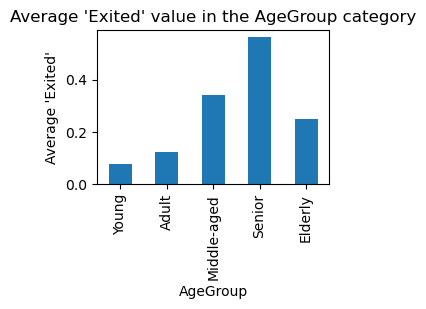

In [15]:
# calculating average object columns by Exited

for i in categorical:
    group_means = df.groupby(i)["Exited"].mean()
    plt.figure(figsize=(3, 2))
    group_means.plot(kind="bar")
    plt.title(f"Average 'Exited' value in the {i} category")
    plt.xlabel(i)
    plt.ylabel("Average 'Exited'")
    plt.show()
    

In [16]:
# Import label encoder

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
for col in ["Geography","Gender","AgeGroup"]:
    df[col] = label_encoder.fit_transform(df[col])

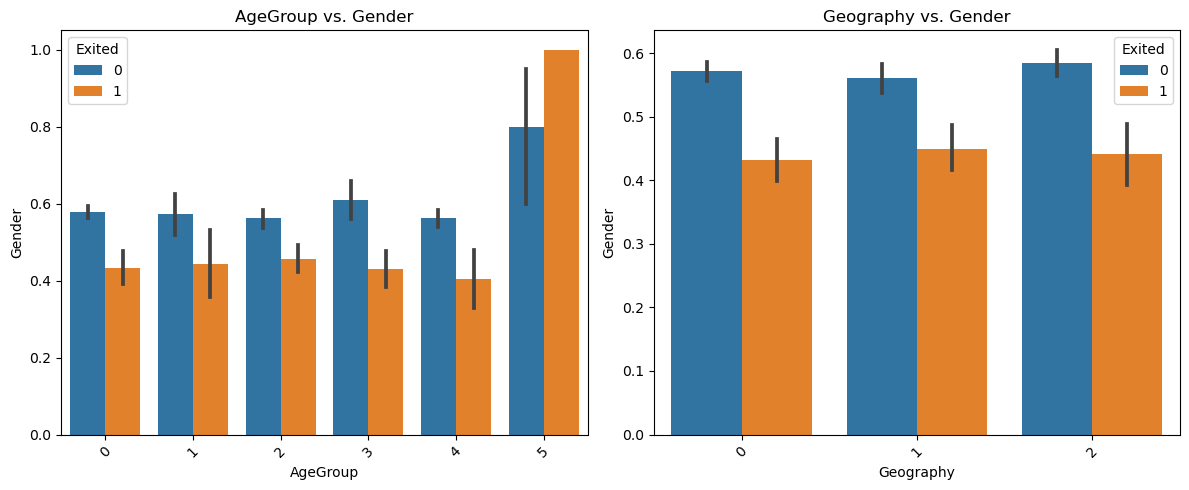

In [17]:
# Create a figure to display two graphs side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First graphs
sns.barplot(x="AgeGroup", y="Gender", hue="Exited", data=df, ax=axes[0])
axes[0].set_title("AgeGroup vs. Gender")

# Second graphs
sns.barplot(x="Geography", y="Gender", hue="Exited", data=df, ax=axes[1])
axes[1].set_title("Geography vs. Gender")


# Rotate axis labels
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

# Show graphics side by side
plt.tight_layout()
plt.show()

In [18]:
# Identıfy X and y data

X= df.drop(["Exited"],axis=1)

y=df["Exited"]

print(X.shape,y.shape)

(10000, 11) (10000,)


In [19]:
# Splitting the dataset into the Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 11) (2000, 11) (8000,) (2000,)


In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# Importing necassary Libraries to creating model and evaluation

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [65]:
# Creating model

knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators = 5,criterion = 'entropy',random_state =1)
svc = SVC()
lr = LogisticRegression()

In [66]:
# We perform training and prediction operations by looping over the classifiers.
# We calculate and print the accuracy score of each classifier.

for clf in (rfc, knn, svc,lr):
    clf.fit(X_train, y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",clf.__class__.__name__,"=",100*metrics.accuracy_score(y_train, Y_pred))

Accuracy score of  RandomForestClassifier = 98.15
Accuracy score of  KNeighborsClassifier = 86.0625
Accuracy score of  SVC = 84.05
Accuracy score of  LogisticRegression = 79.5125


In [72]:
# Training classifiers and evaluating performance metrics

from sklearn import metrics
from sklearn.metrics import confusion_matrix
classifiers = [rfc, knn, svc, lr]

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    auc_roc = metrics.roc_auc_score(y_test, y_pred)
    avg_precision = metrics.average_precision_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print("Metrics for", clf.__class__.__name__)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision Score:", precision)
    print("Recall Score:", recall)
    print("AUC-ROC Score:", auc_roc)
    print("Average Precision Score:", avg_precision)
    print("Confusion metrix:", cm)
    print()


Metrics for RandomForestClassifier
Accuracy: 0.8285
F1 Score: 0.5216178521617852
Precision Score: 0.5993589743589743
Recall Score: 0.4617283950617284
AUC-ROC Score: 0.6916792445528078
Average Precision Score: 0.3857410572966129
Confusion metrix: [[1470  125]
 [ 218  187]]

Metrics for KNeighborsClassifier
Accuracy: 0.8155
F1 Score: 0.46288209606986896
Precision Score: 0.5638297872340425
Recall Score: 0.3925925925925926
AUC-ROC Score: 0.6577383025658888
Average Precision Score: 0.3443553979511426
Confusion metrix: [[1472  123]
 [ 246  159]]

Metrics for SVC
Accuracy: 0.8395
F1 Score: 0.4298401420959147
Precision Score: 0.7658227848101266
Recall Score: 0.29876543209876544
AUC-ROC Score: 0.637783969967878
Average Precision Score: 0.3708013752148773
Confusion metrix: [[1558   37]
 [ 284  121]]

Metrics for LogisticRegression
Accuracy: 0.7955
F1 Score: 0.014457831325301205
Precision Score: 0.3
Recall Score: 0.007407407407407408
AUC-ROC Score: 0.5015093463369324
Average Precision Score: 0.20

## Accuracy
 Accuracy is the ratio of correct predictions to the total number of samples. It represents the percentage of data points that the model correctly classified. For example, an accuracy of 0.8355 means that the model correctly classified 83.55% of the given samples.

## F1 Score
The F1 score is a measure that combines both precision and recall metrics. It is used to evaluate the accuracy of a classification model. The F1 score ranges from 0 to 1, where 1 indicates the best performance. For example, an F1 score of 0.4899 indicates an average performance of the model.

## Precision Score
Precision represents the percentage of positive predictions that are truly positive. It is the ratio of true positives to the total positive predictions. For example, a precision score of 0.6583 means that 65.83% of the positive predictions made by the model are actually positive.

## Recall Score
Recall, also known as sensitivity or true positive rate, represents the percentage of truly positive instances that are correctly predicted by the model. It is the ratio of true positives to the total true positives. For example, a recall score of 0.3901 means that 39.01% of the true positive instances were correctly identified by the model.

## AUC-ROC Score
The AUC-ROC score represents the area under the Receiver Operating Characteristic (ROC) curve. The ROC curve is a graphical representation of the model's performance across various classification thresholds. The AUC-ROC score ranges from 0 to 1, where 1 indicates the best performance. For example, an AUC-ROC score of 0.6694 indicates an average performance of the model.

## Average Precision Score
The average precision score measures the area under the precision-recall curve. It quantifies the trade-off between precision and recall. The average precision score ranges from 0 to 1, where 1 indicates the best performance. For example, an average precision score of 0.3803 indicates an average performance of the model.

## A confusion matrix 
is typically represented as a 2x2 matrix when dealing with binary classification (two classes). Here's a simple explanation:

## True Positives (TP)
The number of positive instances that the model correctly predicted as positive.

## True Negatives (TN)
The number of negative instances that the model correctly predicted as negative.

## False Positives (FP)
The number of negative instances that the model incorrectly predicted as positive.

## False Negatives (FN)
The number of positive instances that the model incorrectly predicted as negative.

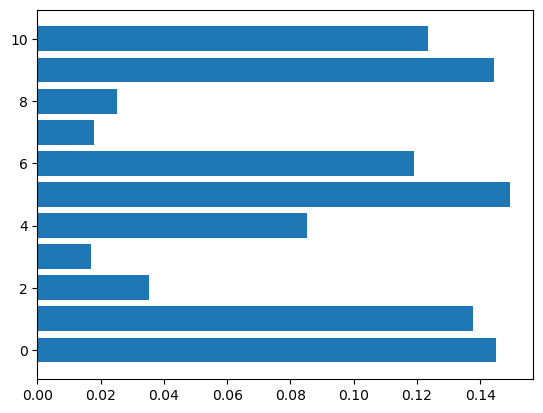

In [68]:
# Calculate feature importances
importances = rfc.feature_importances_
# Create plot
plt.barh(range(X. shape [1]) , importances)
plt.show ()

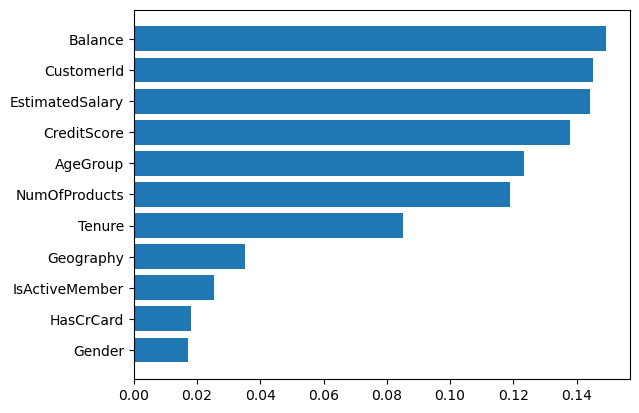

In [69]:
# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt. barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

## feature_importances_ 
is a property of the RandomForestClassifier model that tells us how important each feature (or column) in the dataset is for making predictions. It provides a measure of the relative contribution of each feature to the overall predictive power of the model. Higher values indicate more important features, while lower values indicate less important features. This information can be used for feature selection, feature engineering, and gaining insights into which features are most influential in the model's predictions.

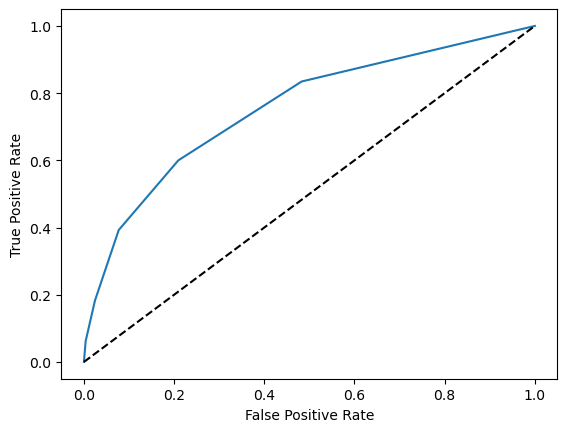

In [74]:
# Import roc_curve
from sklearn.metrics import roc_curve


# Generate the probabilities
y_pred_prob = knn.predict_proba(X_test)[:, 1]
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot the ROC curve
plt.plot(fpr,tpr)
# Add Labels and diagonal line
plt. xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--") 
plt.show()

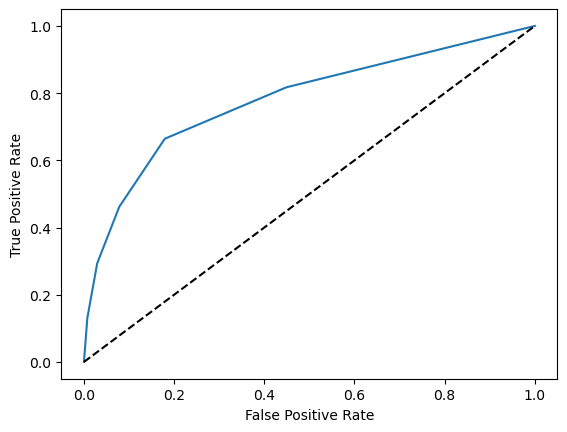

In [75]:
# Generate the probabilities
y_pred_prob = rfc.predict_proba(X_test)[:, 1]
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot the ROC curve
plt.plot(fpr,tpr)
# Add Labels and diagonal line
plt. xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--") 
plt.show()

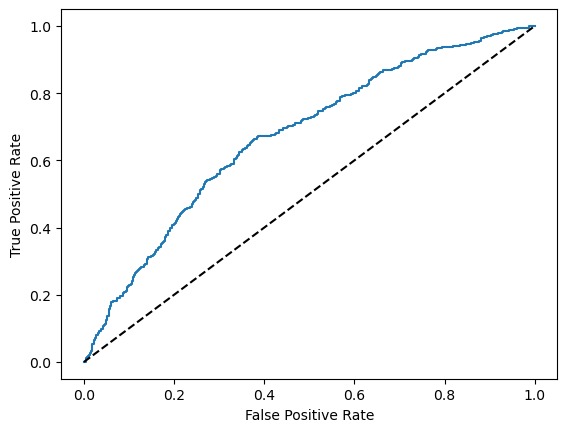

In [76]:
# Generate the probabilities
y_pred_prob = lr.predict_proba(X_test)[:, 1]
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot the ROC curve
plt.plot(fpr,tpr)
# Add Labels and diagonal line
plt. xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--") 
plt.show()